In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns
%matplotlib inline

In [4]:
data = np.loadtxt("Data1_Rema1_Cotovelo.txt", delimiter=',')
data2 = np.loadtxt("Data2_Rema1_Cotovelo.txt", delimiter= ',')

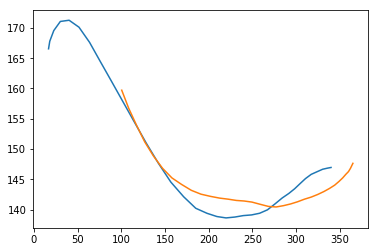

In [5]:
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y)

z = data2[:, 0]
w = data2[:, 1]
plt.plot(z, w)

In [6]:
distances = np.zeros((len(x), len(z)))
#distances2 = np.zeros((len(y), len(w)))

In [7]:
#len(w)

In [8]:
for i in range(len(z)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-z[i])**2  # percorrendo a matriz e calculando distâncias euclidianas#

#for k in range(len(w)):
#    for h in range (len(y)):
#        distances2[k,h] = (w[h]-y[k])**2

distances
#distances2

array([[   626.28608863,    846.41953924,   1198.55067361, ...,
        117242.46909669, 120418.94254966, 121393.41414187],
       [   569.47224703,    780.15189815,   1119.43774366, ...,
        116448.00371412, 119613.76861646, 120584.98344742],
       [   495.29094825,    692.8853145 ,   1014.39161396, ...,
        115352.8169942 , 118503.75987335, 119470.46692427],
       ...,
       [ 49633.84654894,  47837.98677712,  45450.90017556, ...,
          8948.14188294,   9841.05035318,  10121.02777865],
       [ 53648.93103065,  51781.19025963,  49296.43581589, ...,
          7354.56819239,   8166.05529133,   8421.27026517],
       [ 57417.47821019,  55484.68008412,  52911.5293805 , ...,
          6046.88562934,   6784.68066612,   7017.48388129]])

In [9]:
def distance_cost_plot(distances): # função que plota os valores com cores
    im = plt.imshow(distances, interpolation='nearest', cmap='Purples') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

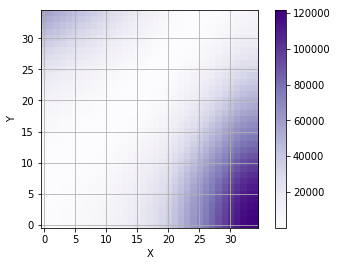

In [10]:
distance_cost_plot(distances)

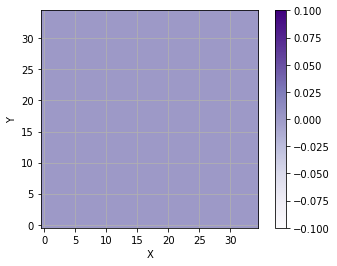

In [11]:
accumulated_cost = np.zeros((len(z), len(x)))
distance_cost_plot(accumulated_cost)

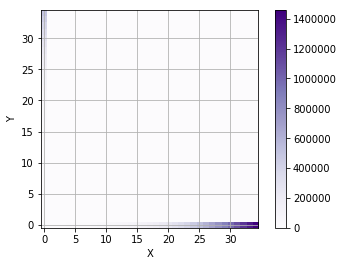

In [12]:
for i in range(1, len(x)): 
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] # preenche as colunas conforme o menor valor anterior
    for i in range(1, len(y)):
        accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0] # preenche a matriz conforme o menor valor anterior
distance_cost_plot(accumulated_cost)

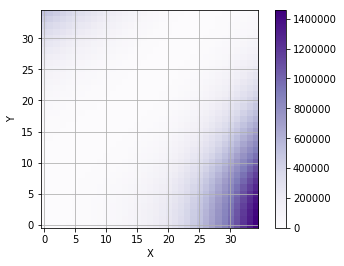

In [13]:
for i in range(1, len(z)): # percorrendo todas as linhas e colunas simultaneamente
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
distance_cost_plot(accumulated_cost)

In [41]:
path = [[len(x)-1, len(z)-1]] # iniciando do tamanho máximo dos vetores
i = len(z)-1 
j = len(x)-1
while i > 0 and j > 0: # enquanto não encontrar a posição (0, 0)
    if i == 0:
        j = j - 1
    elif j == 0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j - 1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])
path

[[34, 34],
 [33, 34],
 [32, 34],
 [31, 34],
 [30, 34],
 [29, 34],
 [28, 34],
 [27, 34],
 [26, 34],
 [25, 34],
 [24, 33],
 [24, 32],
 [23, 31],
 [22, 30],
 [22, 29],
 [21, 28],
 [20, 27],
 [19, 26],
 [19, 25],
 [18, 24],
 [17, 23],
 [16, 22],
 [15, 21],
 [14, 20],
 [13, 19],
 [12, 18],
 [11, 17],
 [10, 16],
 [9, 15],
 [8, 14],
 [7, 13],
 [6, 13],
 [5, 12],
 [4, 11],
 [3, 10],
 [2, 9],
 [1, 8],
 [0, 7],
 [0, 0]]

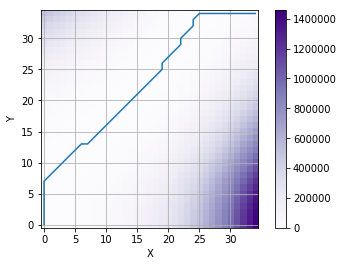

In [42]:
path_x = [point[0] for point in path]
path_z = [point[1] for point in path]

distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_z);

In [43]:
def path_cost(x, z, accumulated_cost, distances):
    path = [[len(x)-1, len(z)-1]]
    cost = 0
    i = len(z)-1
    j = len(x)-1
    while i > 0 and j > 0:
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [z, x] in path:
        cost = cost + distances[x, z]
    return path, cost

34 16.744352275376485 : 34 166.54676821537672
33 18.145602909143896 : 34 166.54676821537672
32 22.7530525214243 : 34 166.54676821537672
31 30.259523930583978 : 34 166.54676821537672
30 40.28497817301146 : 34 166.54676821537672
29 51.57883558811834 : 34 166.54676821537672
28 63.68718533849913 : 34 166.54676821537672
27 76.0289934685588 : 34 166.54676821537672
26 88.45840193214424 : 34 166.54676821537672
25 101.24871893018643 : 34 166.54676821537672
24 114.54019500374626 : 33 167.79833422380892
24 114.54019500374626 : 32 169.55638137725228
23 128.41167561248758 : 31 171.06211623847975
22 142.49783869366416 : 30 171.26117143121522
22 142.49783869366416 : 29 170.11393552434836
21 156.75720305514878 : 28 167.61574710189197
20 171.44778775490863 : 27 164.4385206007299
19 185.25884441098137 : 26 161.27639537062396
19 185.25884441098137 : 25 157.98798120767768
18 198.1836325257232 : 24 154.57601235682537
17 209.4726891903213 : 23 151.027806584504
16 219.9464471978888 : 22 147.6576217618468
15 

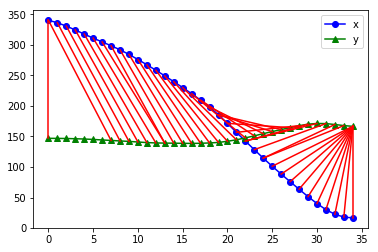

In [44]:
plt.plot(x, 'bo-' ,label = 'x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print (map_x, x[map_x], ":", map_y, y[map_y])
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')